In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('j:/data_science/csv/classification/Cancer_data_1500_V2.csv')
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
model.score(X_test,y_test)

0.8586666666666667

In [15]:
X_test.shape

(375, 8)

In [19]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [21]:
y_pred==y_test

983      True
1468     True
14       True
186      True
931      True
        ...  
547      True
52       True
48      False
291      True
220      True
Name: Diagnosis, Length: 375, dtype: bool

In [23]:
(y_pred==y_test).sum()

322

In [25]:
322/375

0.8586666666666667

In [27]:
model.get_depth()

15

Text(0, 0.5, 'score')

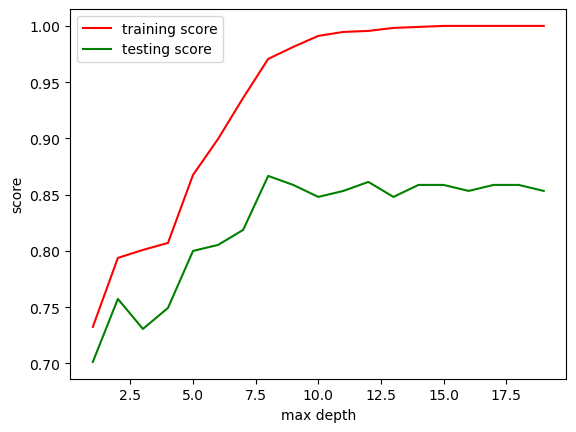

In [31]:
tr_sc=[]
test_sc=[]

for i in range(1,20):
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(X_train,y_train)
    tr_sc.append ( model.score(X_train,y_train)  )
    test_sc.append ( model.score(X_test,y_test)  )

plt.plot(range(1,20),tr_sc,color='r',label='training score')
plt.plot(range(1,20),test_sc,color='g',label='testing score')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('score')

    

Text(0, 0.5, 'score')

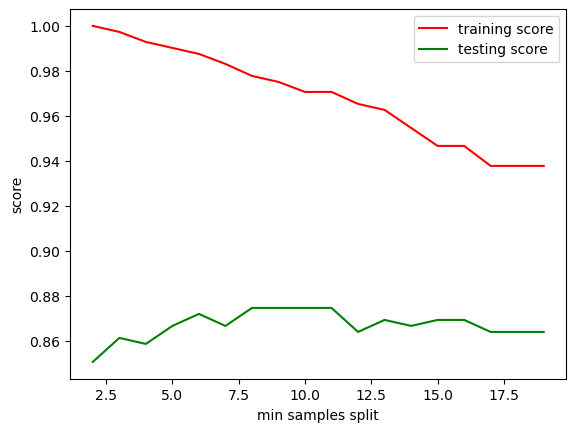

In [33]:
tr_sc=[]
test_sc=[]

for i in range(2,20):
    model=DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
    model.fit(X_train,y_train)
    tr_sc.append ( model.score(X_train,y_train)  )
    test_sc.append ( model.score(X_test,y_test)  )

plt.plot(range(2,20),tr_sc,color='r',label='training score')
plt.plot(range(2,20),test_sc,color='g',label='testing score')
plt.legend()
plt.xlabel('min samples split')
plt.ylabel('score')

Text(0, 0.5, 'score')

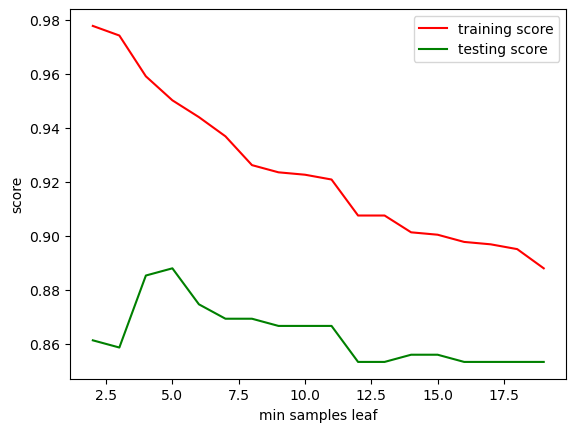

In [35]:
tr_sc=[]
test_sc=[]

for i in range(2,20):
    model=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    model.fit(X_train,y_train)
    tr_sc.append ( model.score(X_train,y_train)  )
    test_sc.append ( model.score(X_test,y_test)  )

plt.plot(range(2,20),tr_sc,color='r',label='training score')
plt.plot(range(2,20),test_sc,color='g',label='testing score')
plt.legend()
plt.xlabel('min samples leaf')
plt.ylabel('score')

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,balanced_accuracy_score,classification_report

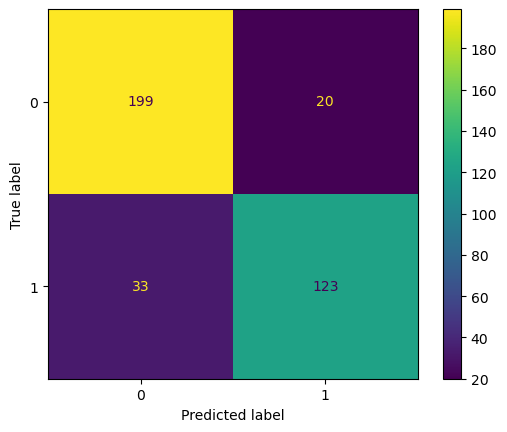

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [41]:
acc_sc=(204+116)/X_test.shape[0]

In [43]:
acc_sc

0.8533333333333334

In [59]:
recall=123/(33+123)
recall

0.7884615384615384

In [69]:
r=recall_score(y_test,y_pred)
r

0.7884615384615384

In [73]:
prec=123/(123+20)
prec

0.8601398601398601

In [75]:
p=precision_score(y_test,y_pred)
p

0.8601398601398601

In [77]:
f1=2*r*p/(p+r)
f1

0.822742474916388

In [79]:
f1_score(y_test,y_pred)

0.822742474916388

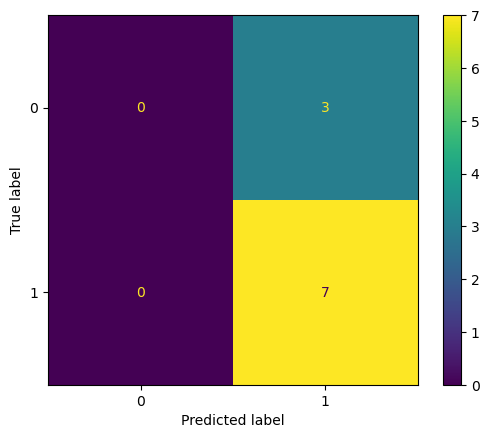

In [83]:
y_true=  [1,1,1,0,0,0,1,1,1,1]
y_pred_2=[1,1,1,1,1,1,1,1,1,1]
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_2)

In [85]:
acc=7/10
acc

0.7

In [87]:
rec=7/7
rec

1.0

In [89]:
balanced_accuracy_score(y_true,y_pred_2)

0.5

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       219
           1       0.86      0.79      0.82       156

    accuracy                           0.86       375
   macro avg       0.86      0.85      0.85       375
weighted avg       0.86      0.86      0.86       375

